In [5]:
def distribute_uniformly(total_demand, N):
    demand_per_item = total_demand / N
    uniform_distribution = {i: demand_per_item for i in range(N)}
    return uniform_distribution

def distribute_lowly_concentrated(total_demand, N, k):
    demand_per_item = []
    total_powers = sum([i ** -k for i in range(1, N + 1)])
    for i in range(1, N + 1):
        demand = (total_demand / total_powers) * (i ** -k)
        demand_per_item.append(demand)
    lowly_concentrated_distribution = {i: demand for i, demand in enumerate(demand_per_item)}
    return lowly_concentrated_distribution

def distribute_highly_concentrated(total_demand, N, alpha):
    demand_per_item = []
    C = total_demand * (alpha - 1) / (alpha ** alpha)
    for i in range(1, N + 1):
        demand = C / (i ** alpha)
        demand_per_item.append(demand)

    # Normalize demands to match the total demand
    total_calculated_demand = sum(demand_per_item)
    normalization_factor = total_demand / total_calculated_demand
    normalized_demand_per_item = [demand * normalization_factor for demand in demand_per_item]
    
    highly_concentrated_distribution = {i: demand for i, demand in enumerate(normalized_demand_per_item)}
    return highly_concentrated_distribution

# Example usage
total_demand = 25000/250
N = 10
k_low = 0.5
alpha_high = 1.5

uniform_distribution = distribute_uniformly(total_demand, N)
lowly_concentrated_distribution = distribute_lowly_concentrated(total_demand, N, k_low)
highly_concentrated_distribution = distribute_highly_concentrated(total_demand, N, alpha_high)

print("Uniform Distribution:", uniform_distribution)
print("Lowly Concentrated Distribution:", lowly_concentrated_distribution)
print("Highly Concentrated Distribution:", highly_concentrated_distribution)


Uniform Distribution: {0: 10.0, 1: 10.0, 2: 10.0, 3: 10.0, 4: 10.0, 5: 10.0, 6: 10.0, 7: 10.0, 8: 10.0, 9: 10.0}
Lowly Concentrated Distribution: {0: 19.916359657128616, 1: 14.082992970105828, 2: 11.498715609320609, 3: 9.958179828564308, 4: 8.906866811534798, 5: 8.130819782286206, 6: 7.527676382068852, 7: 7.041496485052914, 8: 6.638786552376205, 9: 6.298105921561659}
Highly Concentrated Distribution: {0: 50.11686015541615, 1: 17.718985833836324, 2: 9.644994233889449, 3: 6.2646075194270185, 4: 4.482588245054447, 5: 3.410020413644189, 6: 2.706056091074143, 7: 2.2148732292295406, 8: 1.8561800057561537, 9: 1.5848342726725526}


100.0

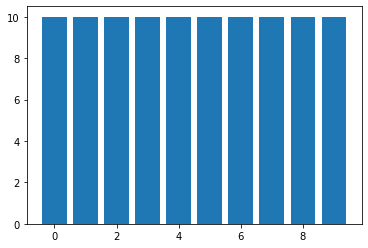

In [6]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(uniform_distribution)), uniform_distribution.values()) 
np.sum(list(uniform_distribution.values()))

99.99999999999999

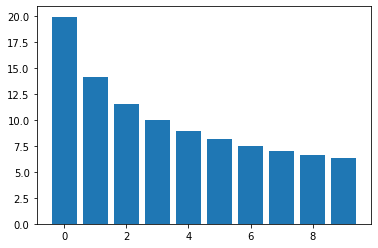

In [7]:

plt.bar(np.arange(len(lowly_concentrated_distribution)), lowly_concentrated_distribution.values()) 
np.sum(list(lowly_concentrated_distribution.values()))


99.99999999999997

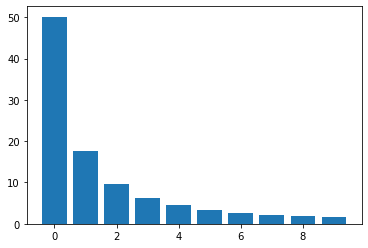

In [8]:

plt.bar(np.arange(len(highly_concentrated_distribution)), highly_concentrated_distribution.values()) 
np.sum(list(highly_concentrated_distribution.values()))

Geometric Distribution: {0: 18.67702894923509, 1: 15.87547460684983, 2: 13.494153415822353, 3: 11.470030403449, 4: 9.74952584293165, 5: 8.287096966491902, 6: 7.044032421518116, 7: 5.987427558290398, 8: 5.089313424546839, 9: 4.325916410864813}


100.0

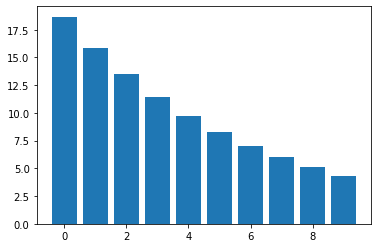

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def distribute_geometric(total_demand, N, p):
    demand_per_item = []
    if p != 0:
        geometric_sum = sum([p * (1 - p) ** (i - 1) for i in range(1, N + 1)])
        for i in range(1, N + 1):
            demand = (total_demand / geometric_sum) * (p * (1 - p) ** (i - 1))
            demand_per_item.append(demand)
        geometric_distribution = {i: demand for i, demand in enumerate(demand_per_item)}
    
    else:
        demand_per_item = total_demand / N
        geometric_distribution = {i: demand_per_item for i in range(N)}
        
    return geometric_distribution

# Example usage
total_demand = 25000 / 250
N = 10
p = 0.15


geometric_distribution = distribute_geometric(total_demand, N, p)
print("Geometric Distribution:", geometric_distribution)


plt.bar(np.arange(len(geometric_distribution)), geometric_distribution.values()) 
np.sum(list(geometric_distribution.values()))

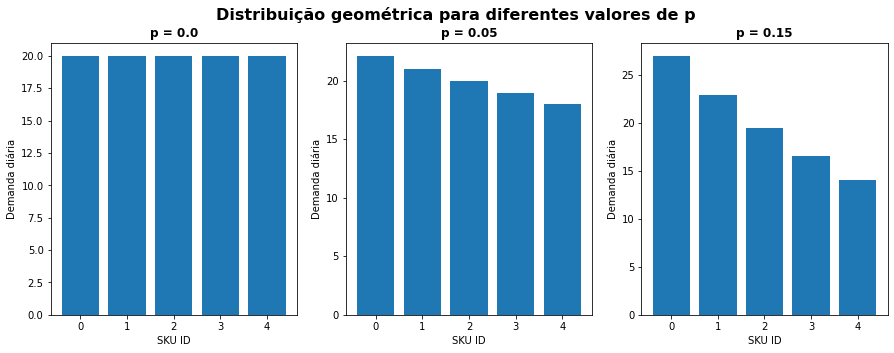

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def distribute_geometric(total_demand, N, p):
    demand_per_item = []
    if p != 0:
        geometric_sum = sum([p * (1 - p) ** (i - 1) for i in range(1, N + 1)])
        for i in range(1, N + 1):
            demand = (total_demand / geometric_sum) * (p * (1 - p) ** (i - 1))
            demand_per_item.append(demand)
        geometric_distribution = {i: demand for i, demand in enumerate(demand_per_item)}
    
    else:
        demand_per_item = total_demand / N
        geometric_distribution = {i: demand_per_item for i in range(N)}
        
    return geometric_distribution

# Values for p
p_values = [0.0, 0.05, 0.15]
total_demand = 25000 / 250
N = 5

# Create subplots
fig, axes = plt.subplots(1, len(p_values), figsize=(15, 5))

# Plot for each value of p
for i, p in enumerate(p_values):
    geometric_distribution = distribute_geometric(total_demand, N, p)
    ax = axes[i]
    ax.bar(np.arange(len(geometric_distribution)), geometric_distribution.values())
    ax.set_title(f'p = {p}', fontweight='bold')
    ax.set_ylabel('Demanda diária')  # Y-axis title
    ax.set_xlabel('SKU ID')  # X-axis title

    
plt.suptitle('Distribuição geométrica para diferentes valores de p', fontsize=16, fontweight='bold')

plt.show()


In [20]:
import pandas as  pd

df = pd.read_excel("./DoE/DoE - TCC v3.xlsx", sheet_name = "DoE")


,OrdemPad,OrdemEns,N,cv,rho,p,algorithm
0,470,1,5,0.25,0.7,0.00,NM
1,395,2,20,0.25,0.9,0.15,GA
2,376,3,20,0.25,0.8,0.00,ACO
3,312,4,10,0.50,0.8,0.15,ACO
4,968,5,10,0.50,0.9,0.05,ACO
...,...,...,...,...,...,...,...
967,10,968,20,0.10,0.7,0.15,NM
968,524,969,5,0.50,0.8,0.05,ACO
969,732,970,20,0.50,0.7,0.15,ACO
970,533,971,5,0.50,0.9,0.05,RD


In [26]:
# Assuming you have a DataFrame called 'df'

# Select the first 10 rows
df_head = df.head(10)

# Select the last 10 rows
df_tail = df.tail(10)

# Concatenate the selected rows into a single DataFrame
df_selected = pd.concat([df_head, df_tail])

# Convert the selected DataFrame to LaTeX format
latex_output = df_selected.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format)

# Print the LaTeX output
print(latex_output)


\begin{tabular}{rrrrrrl}
\toprule
 OrdemPad &  OrdemEns &  N &  cv &  rho &   p & algorithm \\
\midrule
      470 &         1 &  5 & 0.2 &  0.7 & 0.0 &        NM \\
      395 &         2 & 20 & 0.2 &  0.9 & 0.1 &        GA \\
      376 &         3 & 20 & 0.2 &  0.8 & 0.0 &       ACO \\
      312 &         4 & 10 & 0.5 &  0.8 & 0.1 &       ACO \\
      968 &         5 & 10 & 0.5 &  0.9 & 0.1 &       ACO \\
       64 &         6 & 20 & 0.2 &  0.9 & 0.0 &       ACO \\
      465 &         7 &  5 & 0.1 &  0.9 & 0.1 &        RD \\
      292 &         8 & 10 & 0.5 &  0.7 & 0.0 &       ACO \\
      708 &         9 & 20 & 0.2 &  0.8 & 0.1 &       ACO \\
      231 &        10 & 10 & 0.1 &  0.8 & 0.0 &        GA \\
      725 &       963 & 20 & 0.5 &  0.7 & 0.1 &        RD \\
      212 &       964 &  5 & 0.5 &  0.9 & 0.1 &       ACO \\
      460 &       965 &  5 & 0.1 &  0.9 & 0.0 &       ACO \\
      886 &       966 & 10 & 0.1 &  0.8 & 0.1 &        NM \\
      150 &       967 &  5 & 0.2 &  0.7 & 